In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
import pandas as pd

In [113]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


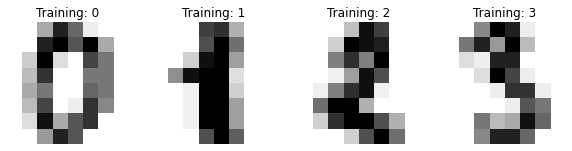

In [114]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [115]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
# Learn the digits on the train subset
#clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
#predicted = clf.predict(X_test)

In [117]:
mean = [4,2]
cov = [[1,  -0.5],
       [-0.5, 1]]
dist = np.random.multivariate_normal(mean, cov, 500)

print(dist.shape)

(500, 2)


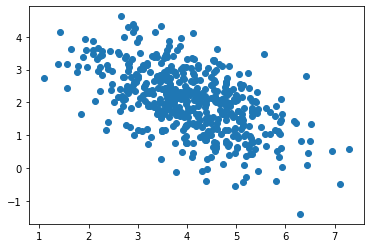

In [118]:
plt.figure()
plt.scatter(dist[:,0], dist[:,1])
plt.show()

In [119]:
mean_01 = [4,2]
cov_01 = [[1,  0.5],
         [0.5, 1]]
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)

mean_02 = [1,3]
cov_02 = [[1.3,  -0.3],
         [-0.3, 1.5]]
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


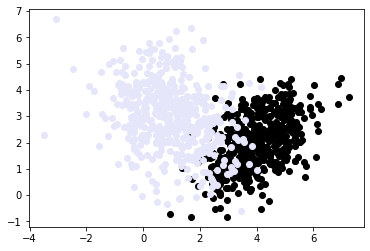

In [120]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='black')
plt.scatter(dist_02[:,0], dist_02[:,1], color='lavender')
# plt.scatter(2.3, 2, color='black', marker='*', s=300)
plt.show()

In [121]:
rows = dist_01.shape[0] + dist_02.shape[0]
columns = dist_01.shape[1] + 1 # extra columns for labels

dataset = np.zeros((rows, columns))
dataset.shape

(1000, 3)

In [122]:
dataset[:dist_01.shape[0], :-1] = dist_01
dataset[dist_01.shape[0]:, :-1] = dist_02

# Assigning labels
dataset[:dist_01.shape[0], -1] = 0 # Redundant
dataset[dist_01.shape[0]:, -1] = 1

In [123]:
np.random.shuffle(dataset)

In [124]:
split = int(0.8 * dataset.shape[0])

X_train = dataset[:split, :-1]
X_test = dataset[split:, :-1]

y_train = dataset[:split, -1]
y_test = dataset[split:, -1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)


In [125]:
TP = np.array([-1.5, 5.2])

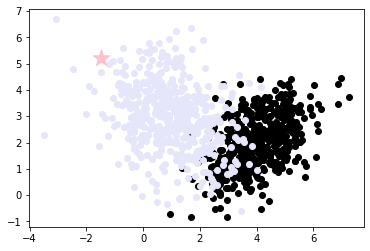

In [126]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='black')
plt.scatter(dist_02[:,0], dist_02[:,1], color='lavender')
plt.scatter(TP[0], TP[1], color='pink', marker='*', s=300)
plt.show()


In [127]:
def euclidean(a1, a2):
    return np.sqrt(np.sum((a1 - a2) ** 2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [128]:
X_train[0], y_train[0]

(array([-0.90861385,  2.7131939 ]), 1.0)

In [165]:
def knn(X_train, y_train, test_point, k=1):
    
    distances = []
    
#     for i in range(X_train.shape[0]):
#         data_point = X_train[i]
#         label = y_train[i]

    # 1) Compute distances
    for data_point, label in zip(X_train, y_train):
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    # 2) Sort
    distances = sorted(distances, key=lambda x: x[0])
    
    # 3) Choose k nearest neighbors
    k_nearest_neighbors = np.array(distances[:k])  
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    # 4) Decide (Majority Voting)
    verdict = labels[counts.argmax()]
    return verdict
knn(X_train, y_train, TP)

1.0

In [166]:
def get_predictions(X_train, y_train, X_test, k=1):
    predictions = []
    
    for test_point in X_test:
        pred = knn(X_train, y_train, test_point, k)
        predictions.append(pred)
        
    return np.array(predictions)

In [167]:
def calculate_accuracy(predictions, true_labels):
    return (predictions == true_labels).sum() / true_labels.shape[0]

In [168]:
predictions = get_predictions(X_train, y_train, X_test)
calculate_accuracy(predictions, y_test)

0.865